In [55]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [29]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [30]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [44]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_results = session.query(Measurement.date,Measurement.tobs).\
filter(extract('month',Measurement.date) == 6).all()

In [45]:
#  3. Convert the June temperatures to a list.
june_list = [temp.tobs for temp in june_results]

In [49]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df = pd.DataFrame(june_list,columns = ['June_Temp'])
df.head()

,June_Temp
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0


<AxesSubplot:>

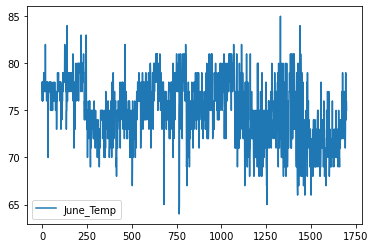

In [56]:
df.plot()

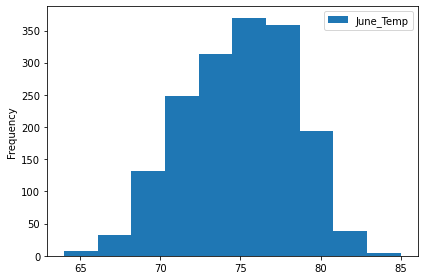

In [60]:
df.plot.hist(bins=10)
plt.tight_layout()

In [50]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df.describe()

,June_Temp
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [51]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_results = session.query(Measurement.date,Measurement.tobs).\
filter(extract('month',Measurement.date) == 12).all()

In [52]:
# 7. Convert the December temperatures to a list.
dec_list = [temp.tobs for temp in dec_results]

In [53]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df2 = pd.DataFrame(dec_list,columns = ['Dec_Temp'])
df2.head()

,Dec_Temp
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0


<AxesSubplot:>

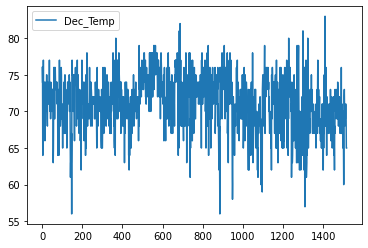

In [58]:
df2.plot()

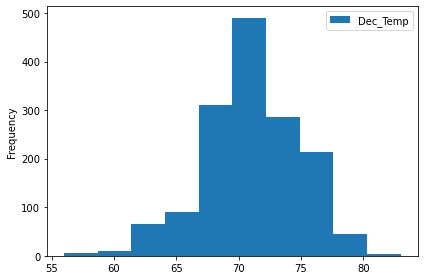

In [61]:
df2.plot.hist(bins=10)
plt.tight_layout()

In [54]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df2.describe()

,Dec_Temp
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000
